<a href="https://colab.research.google.com/github/tejasmorkar/machine-learning/blob/master/fashionMnistDatasetBySimpleClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing and Importing Dependencies

In [0]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

tf.enable_eager_execution()

1.13.1


#Downloading and Cleaning Dataset

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples: {}'.format(num_train_examples))
print('Number of test examples: {}'.format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [0]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#Exploring Data

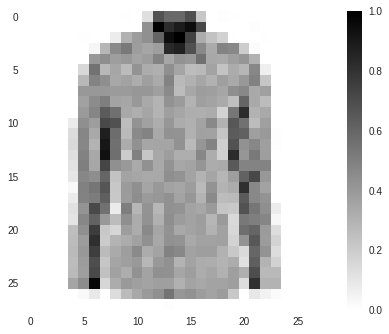

In [0]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

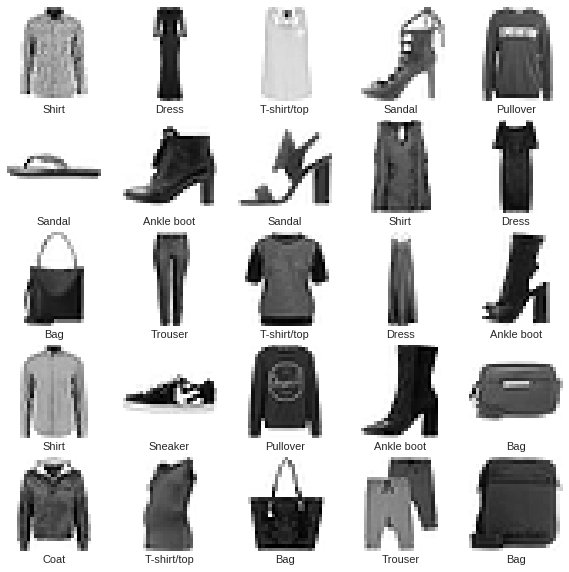

In [0]:
plt.figure(figsize=(10,10))
i = 0
for image, label in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

#Building the Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4986 - acc: 0.8239
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3747 - acc: 0.8645
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3341 - acc: 0.8780
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3125 - acc: 0.8857
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2962 - acc: 0.8918


#Evaluating Accuracy

In [0]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on the test dataset: {}'.format(test_accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 0.3842 - acc: 0.8656
Accuracy on the test dataset: 0.8655999898910522


#Making Predictions

In [0]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [0]:
print(predictions.shape, '\n', predictions[0], '\n', np.argmax(predictions[0]), '\t', test_labels[0])

(32, 10) 
 [1.08763226e-04 3.67464956e-08 6.80103805e-03 1.46602697e-05
 6.84975311e-02 1.30377016e-08 9.24576938e-01 5.25824140e-09
 1.12137741e-06 6.13621043e-10] 
 6 	 6
